# Определение стратегии взаимодействия с клиентами на основе аналитических данных Сети фитнес-центров «Культурист-датасаентист»

## Изучение данных из файла и предобработка

In [1]:
import pandas as pd
import seaborn as sns
from IPython.display import display
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore') 

In [2]:
sport = pd.read_csv('/datasets/gym_churn.csv')
display(sport.head())

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [3]:
sport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


In [4]:
print('пол')
print(sport['gender'].value_counts())

print('-------------------------------------------------------------')
print('проживание или работа в районе, где находится фитнес-центр')
print(sport['Near_Location'].value_counts())

print('-------------------------------------------------------------')
print('сотрудник компании-партнёра клуба')
print(sport['Partner'].value_counts())

print('-------------------------------------------------------------')
print('Promo_friends')
print(sport['Promo_friends'].value_counts())

print('-------------------------------------------------------------')
print('Phone')
print(sport['Phone'].value_counts())

print('-------------------------------------------------------------')
print('длительность действующего абонемента (1, 3, 6, 12 месяцев)')
print(sport['Contract_period'].value_counts())

print('-------------------------------------------------------------')
print('Group_visits')
print(sport['Group_visits'].value_counts())

print('-------------------------------------------------------------')
print('Age')
print(sport['Age'].value_counts())

print('-------------------------------------------------------------')
print('срок до окончания текущего действующего абонемента (в месяцах)')
print(sport['Month_to_end_contract'].value_counts())

print('-------------------------------------------------------------')
print('время с момента первого обращения в фитнес-центр (в месяцах)')
print(sport['Lifetime'].value_counts())

print('-------------------------------------------------------------')
print('факт оттока в текущем месяце')
print(sport['Churn'].value_counts())

пол
1    2041
0    1959
Name: gender, dtype: int64
-------------------------------------------------------------
проживание или работа в районе, где находится фитнес-центр
1    3381
0     619
Name: Near_Location, dtype: int64
-------------------------------------------------------------
сотрудник компании-партнёра клуба
0    2053
1    1947
Name: Partner, dtype: int64
-------------------------------------------------------------
Promo_friends
0    2766
1    1234
Name: Promo_friends, dtype: int64
-------------------------------------------------------------
Phone
1    3614
0     386
Name: Phone, dtype: int64
-------------------------------------------------------------
длительность действующего абонемента (1, 3, 6, 12 месяцев)
1     2207
12     960
6      833
Name: Contract_period, dtype: int64
-------------------------------------------------------------
Group_visits
0    2351
1    1649
Name: Group_visits, dtype: int64
-------------------------------------------------------------
Age
29

In [5]:
sport = sport.astype({'Month_to_end_contract':'int'})

In [6]:
sport = sport.drop_duplicates() 
sport.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null int64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(3), int64(11)
memory usage: 468.8 KB


## Исследовательский анализ данных (EDA)

In [7]:
sport.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


<div class="alert alert-info"> <b>  </b> 
    
•	НЕ менее 75% клиентов клуба проживают или работают в районе, где находится фитнес-центр;
    
•	НЕ более 25% клиентов клуба являются сотрудниками компании-партнёра клуба; 
    
•	НЕ более 25% клиентов клуба использовали промо-код от знакомого при оплате первого абонемента;
    
•	У 75% клиентов клуба длительность текущего действующего абонемента - 1 месяц;
    
•	25% клиентов клуба посещают групповые занятия;
    
•	У 75% клиентов клуба время с момента первого обращения в фитнес-центр меньше 5 месяцев;   
    
•	Между средней частота посещений в неделю за все время с начала действия абонемента и за предыдущий месяц нет принципиальной разницы если не делить на две группы "ушли-не ушли";
    
•	У 75% клиентов клуба не ушли в текущем месяце.    
    
    
<b>На первый взгляд проживание или работа в районе, где находится фитнес-центр, влияет на посещение. Большая часть клиентов пользуется месячным абонементом, что не очень хорошо для клуба, возможно, стоит подумать над хорошим предложением по более длительным абонементам. Значительно увеличился поток клиентов, впервые обратившихся, 1-2 месяца назад (исходя из уникальных значений	'Lifetime' — Когорта 1 +2) 1450 человек, а это 36% от всех. Есть смысл обратить внимание на акции, предложения в это время и, возможно, повторить. </b>    
</div>

In [8]:
sport.groupby('Churn').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


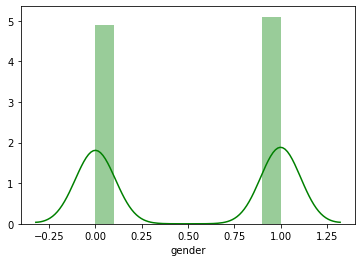

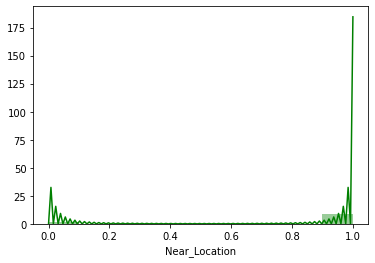

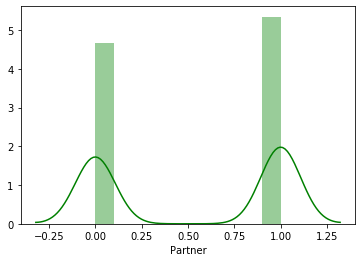

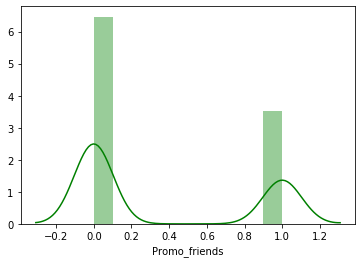

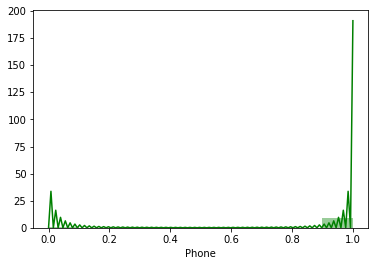

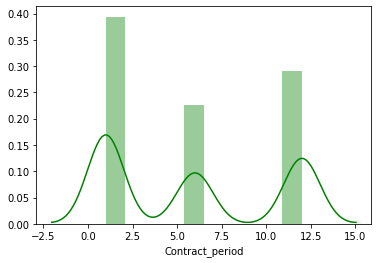

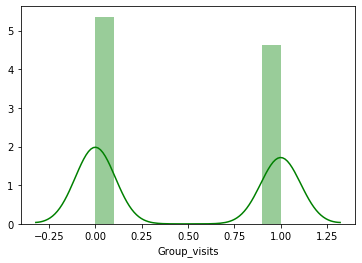

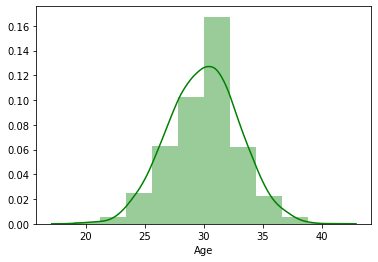

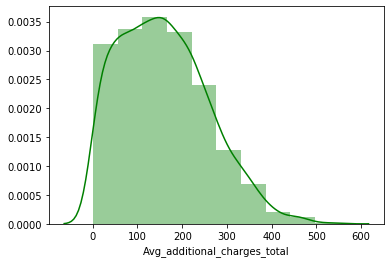

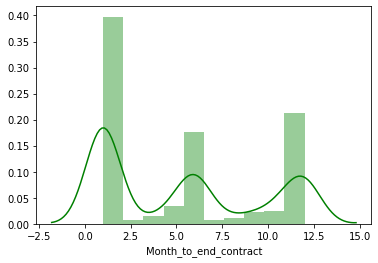

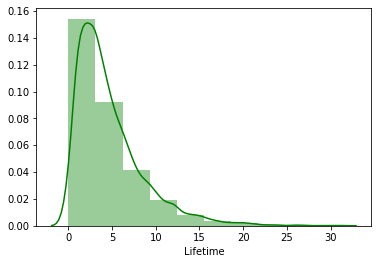

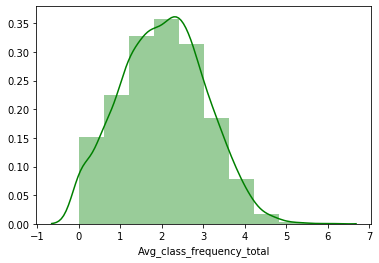

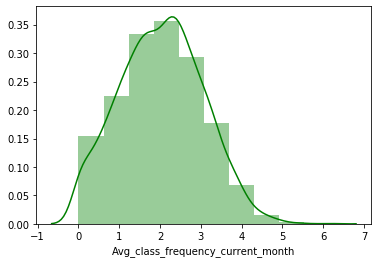

In [9]:
for i in sport.query('Churn == 0').drop(['Churn'], axis=1).columns:
    sns.distplot(sport.query('Churn == 0')[i], bins=10, color = 'green')
    plt.show() 


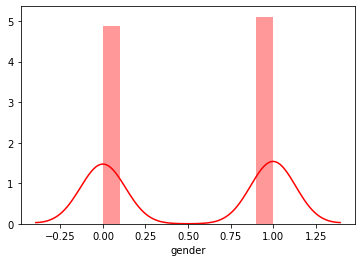

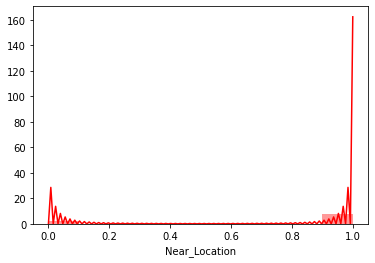

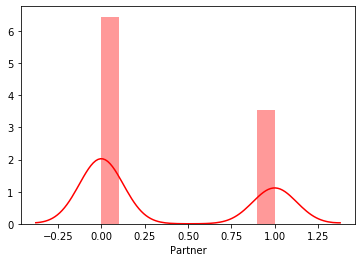

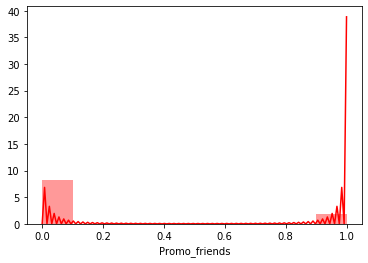

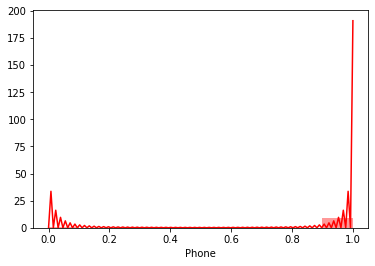

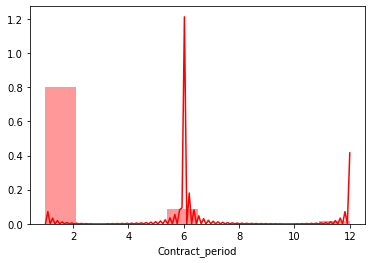

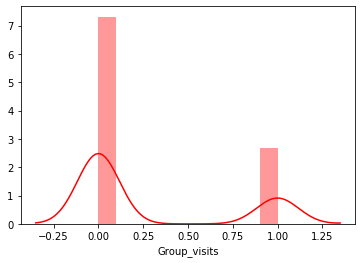

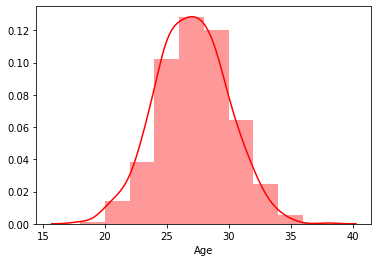

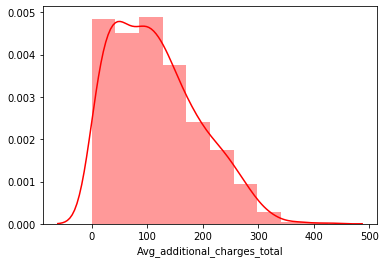

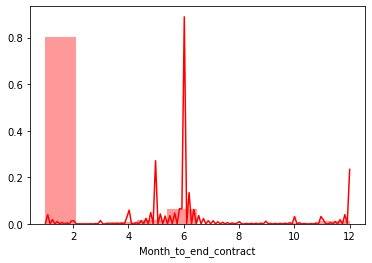

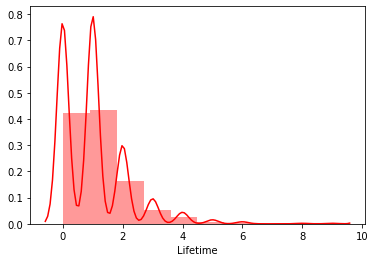

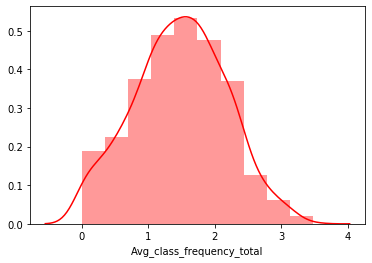

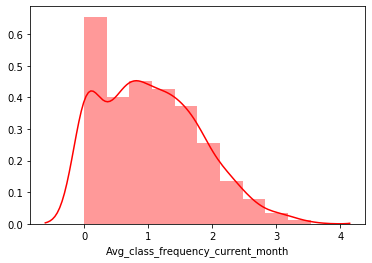

In [10]:
for i in sport.query('Churn == 1').drop(['Churn'], axis=1).columns:
    sns.distplot(sport.query('Churn == 1')[i], bins=10, color = 'red')
    plt.show() 


<div class="alert alert-info"> <b>Уже прослеживается явная закономерность. Меньше подвержены оттоку клиенты, которые: </b> 
    
•	Проживают или работают в районе, где находится фитнес-центр;
    
•	Являются сотрудниками компании-партнёра клуба; 
    
•	Использовали промо-код от знакомого при оплате первого абонемента;
    
•	Длительность текущего действующего абонемента больше 1 месяц;
    
•	Посещают групповые занятия;
    
•	Дольше срок окончания текущего абонемента;   
    
•	Прошло больше времени с момента первого обращения в фитнес-центр, в среднем не менее 4 месяцев;
    
•	Средняя частота посещений в неделю за предыдущий месяц выше, в среднем не менее 2 раза  неделю.    
    
    
   
</div>

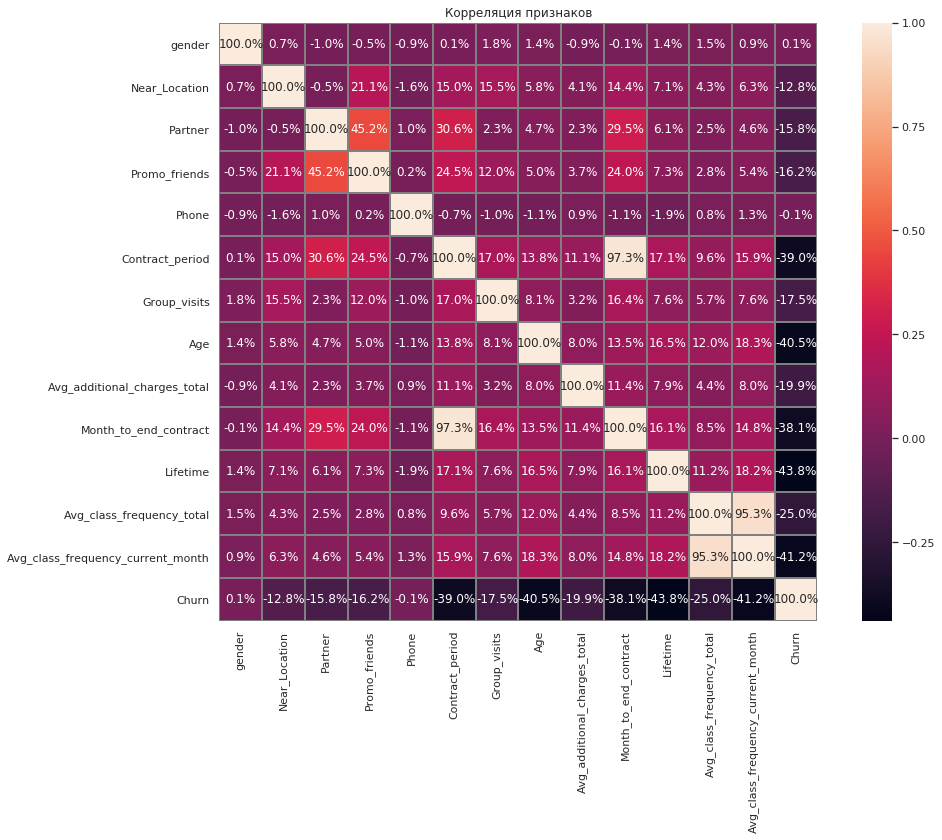

In [11]:
cm = sport.corr() 

sns.set(style='white')
plt.figure(figsize=(16, 11))
plt.title('Корреляция признаков')
sns.heatmap(cm, annot = True, square=True, fmt='.1%', linewidths=1, linecolor='gray')
plt.show()

<div class="alert alert-info"> <b>Расположим факторы, влияющие на отток, по убыванию значимости (т.е. сначала идут те, которые оказывают наибольшее влияние), разделим на три группы. </b> 
    
**Максимально влияют, около 40%:**    
    
•	Время с момента первого обращения в фитнес-центр, чем оно больше, тем менее вероятен отток;
    
•	Средняя частота посещений в неделю за предыдущий месяц; 
    
•	Возраст и длительность текущего действующего абонемента;
    
•	Срок до окончания текущего действующего абонемента (в месяцах);
    
**Среднее влияние - 25%:**
    
•	Средняя частота посещений в неделю за все время с начала действия абонемента;
    
**В меньшей степени влияние - 12-20%:**
    
•	Остальные факторы, кроме пола и телефона;   
    

    
<b>Чем больше вышеуказанные показатели, тем менее вероятен отток</b> 
    
Пол и телефон не влияют.    
    
    
   
</div>

<div class="alert alert-info"> <b> </b> 
    
**Между собой сильно кореллируют:**    
    
•	'Month_to_end_contract' — срок до окончания текущего действующего абонемента и 'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год), они оказывают одинаковое влияние на отток.
    
Исключим из рассмотрения 'Avg_additional_charges_total'(суммарная выручка от других услуг фитнес-центра), т.к. при группировке по оттоку нет принципиальной разницы(для модели "случайной лес" метрики без этих данных будут лучше, я проверила это фактически, рассчитав метрики с этими данными и без) 
        
<b>Исключим из рассмотрения: Month_to_end_contract, Avg_additional_charges_total,  Пол и телефон (т.к. не влияют), Avg_class_frequency_current_month.</b> 
    
           
</div>

In [12]:
sport.columns

Index(['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month',
       'Churn'],
      dtype='object')

In [13]:
#Исключим из рассмотрения: Month_to_end_contract, Avg_additional_charges_total,  
#Пол и телефон (т.к. не влияют), Avg_class_frequency_current_month
sport= sport[['Near_Location', 'Partner', 'Promo_friends',
       'Contract_period', 'Group_visits', 'Age', 'Avg_additional_charges_total',
       'Lifetime', 'Avg_class_frequency_total', 'Churn']]
sport.columns

Index(['Near_Location', 'Partner', 'Promo_friends', 'Contract_period',
       'Group_visits', 'Age', 'Avg_additional_charges_total', 'Lifetime',
       'Avg_class_frequency_total', 'Churn'],
      dtype='object')

## Модель прогнозирования оттока клиентов

### Логистическая регрессия

In [14]:
# разделим данные на признаки (матрица X) и целевую переменную (y)
X = sport.drop(['Churn'], axis=1) 
y = sport['Churn']


In [15]:
# разделяем модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify = y)

In [16]:
# задаём алгоритм для модели 
lr_model = LogisticRegression(solver='liblinear', random_state=0) 

In [17]:
# обучим модель
lr_model.fit(X_train, y_train)

# воспользуемся уже обученной моделью, чтобы сделать прогнозы
lr_predictions = lr_model.predict(X_test) 
lr_probabilities = lr_model.predict_proba(X_test)[:,1] 
print(lr_predictions[:5])
print(lr_probabilities[:5])


[1 0 0 0 0]
[0.7189894  0.09573218 0.00798086 0.05601188 0.0345909 ]


### Случайный лес

In [18]:
# зададим алгоритм для новой модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators = 100, random_state=0) 
# обучим модель случайного леса
rf_model.fit(X_train, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test)
rf_probabilities = rf_model.predict_proba(X_test)[:, 1]
print(rf_predictions[:5])
print(rf_probabilities[:5])

[1 0 0 0 0]
[0.96 0.03 0.03 0.01 0.01]


### Метрики accuracy, precision и recall для обеих моделей 

In [19]:
def print_all_metrics(y_true, y_pred, y_proba, title='Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))



In [20]:
print_all_metrics(
    y_test,
    lr_predictions,
    lr_probabilities,
    title='Метрики для модели - логистической регрессии:',
)


Метрики для модели - логистической регрессии:
	Accuracy: 0.90
	Precision: 0.82
	Recall: 0.81


In [21]:
print_all_metrics(
    y_test,
    rf_predictions,
    rf_probabilities,
    title='Метрики для модели - случайный лес:',
)


Метрики для модели - случайный лес:
	Accuracy: 0.90
	Precision: 0.83
	Recall: 0.77


<div class="alert alert-info"> <b> </b> 
    
**Метрики двух моделей практически не отличаются, кроме Recall**    
    
•	**Аccuracy** (доля правильных ответов) в обоих случаях почти одиноковый - 90%
    
•	**Precision** (доля правильных ответов среди предсказанных ушедших клиентов) - 82 и 83%, т.е. часть клиентов, которым спрогнозировали отток, не ушли.  
    
•	**Recall** (сколько реальных объектов "1" класса смогли обнаружить)  в данном случае сколько клиентов, которые ушли, удалось предсказать -  81% и 77% клиентов   
    
**Модель "Логистическая регрессия" показала себя лучше в предсказании**, т.к. обнаружила бОльший % оттока.           
</div>

In [22]:
pd.DataFrame(
    data={'feature': X.columns, 'importance': rf_model.feature_importances_}
).sort_values(by = 'importance', ascending = False)


,feature,importance
7,Lifetime,0.328173
8,Avg_class_frequency_total,0.177775
5,Age,0.156822
6,Avg_additional_charges_total,0.145578
3,Contract_period,0.125755
4,Group_visits,0.020653
1,Partner,0.017735
2,Promo_friends,0.014188
0,Near_Location,0.013321


<div class="alert alert-info"> <b> </b> 
    
**Самым важными признаками, влияющими на отток являются:** 
    
1. Lifetime - время с момента первого обращения в фитнес-центр (в месяцах),
    
2. Средняя частота посещений в неделю


    
Самым НЕ важными являются: Near_Location (проживание или работа в районе, где находится фитнес-центр),  использование промо-кода от знакомого при оплате первого абонемента, сотрудник компании-партнёра клуба,  факт посещения групповых занятий.
    
    
</div>

## Кластеризация клиентов

In [23]:
scaler = StandardScaler() # создаём объект класса scaler (нормализатор)
X_sc = scaler.fit_transform(sport.drop(columns = ['Churn'])) # обучаем нормализатор и преобразуем набор данных 
(X_sc[:1]) 

array([[ 0.42788074,  1.02686062,  1.49716101,  0.28989014,  1.19403206,
        -0.0565538 , -1.37753121, -0.19332863, -1.91191971]])

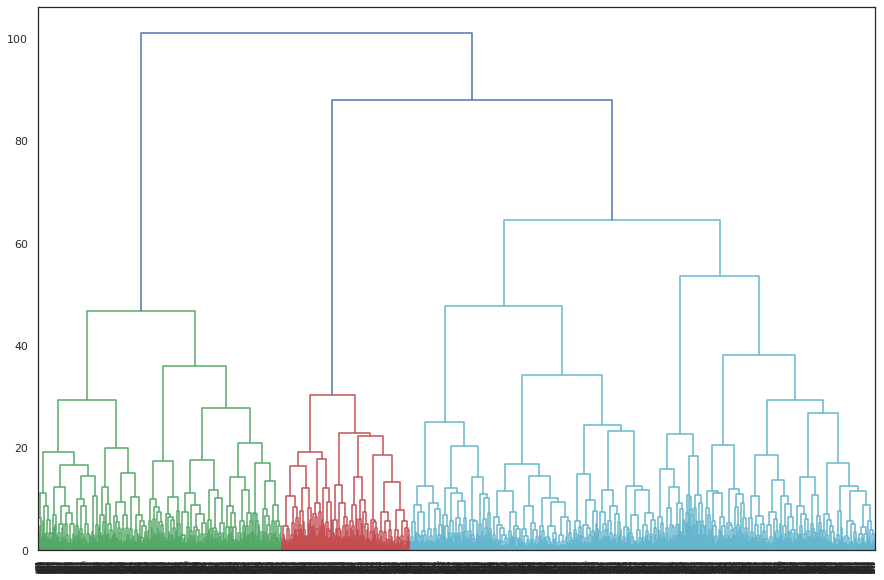

In [24]:
linked = linkage(X_sc, method = 'ward') #таблица «связок» между объектами

plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.show() 


In [25]:
km = KMeans(n_clusters = 5, random_state=0) # задаём число кластеров равное 5
labels = km.fit_predict(X_sc) # применяем алгоритм к данным и формируем вектор кластеров 
print('Silhouette_score: {:.2f}'.format(silhouette_score(X_sc, labels)))

Silhouette_score: 0.17


### Средние значения для каждого кластера

In [26]:
# сохраним метки кластера в поле нашего датасета
sport['number'] = labels
sport.groupby('number').mean().sort_values(by = 'Churn')

,Near_Location,Partner,Promo_friends,Contract_period,Group_visits,Age,Avg_additional_charges_total,Lifetime,Avg_class_frequency_total,Churn
number,,,,,,,,,,
4,0.954683,0.495468,0.241692,5.888218,0.429003,30.262840,167.061566,12.525680,2.217033,0.000000
1,0.996113,0.960155,0.941691,7.448980,0.479106,29.574344,154.498117,3.634597,1.931320,0.133139
2,1.000000,0.244014,0.084379,4.461802,1.000000,29.458381,146.463808,2.850627,1.920231,0.224629
3,0.000000,0.490000,0.071667,2.945000,0.228333,28.681667,136.832314,2.783333,1.765080,0.408333
0,1.000000,0.246776,0.058469,2.950129,0.000000,28.584695,140.112487,2.444540,1.764249,0.414445


<div class="alert alert-info"> <b> </b> 
    
**Группа № 1 и 4** - активные пользователи услугами клуба, большая часть является сотрудниками компаний-партнёров клуба, пришли по приглашению друга, длительность действующего абоненмента у них выше, посещают груповые занятия 50%. Группа № 4 значительно дольше являются пользователями клуба. Отток у этих групп минимальный.
    
**Группы № 0,3** - не посещают и мало посещают групповые занятия, не использовали промо-код от знакомого при оплате первого абонемента, т.е. сработало не сарафанное радио, длительность действующего абоненмента у них низкая, груп.занятия не посещают, не долго являются пользователями клуба. Отток у этих групп высокий - 40%.
    
**Группа № 2** - имеет средние показатели относительно Групп №1,4 и № 0,3. 
    
Самая заинтересованная, спортивноориентированная, лояльная к клубу группа - **№ 4**.
    
</div>

### Распределение признаков для каждого кластера

In [27]:
sport.columns

Index(['Near_Location', 'Partner', 'Promo_friends', 'Contract_period',
       'Group_visits', 'Age', 'Avg_additional_charges_total', 'Lifetime',
       'Avg_class_frequency_total', 'Churn', 'number'],
      dtype='object')

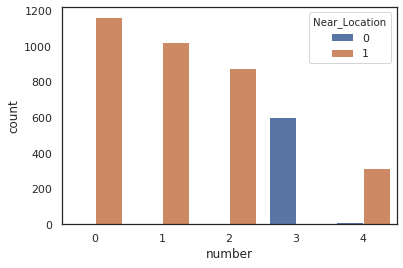

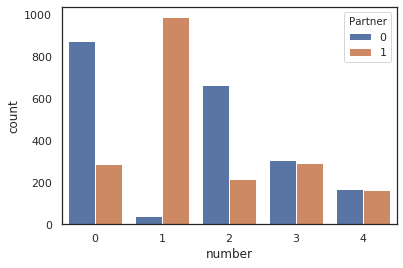

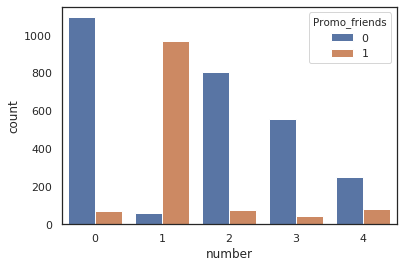

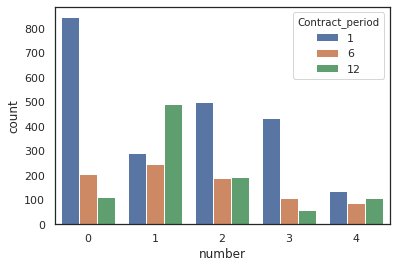

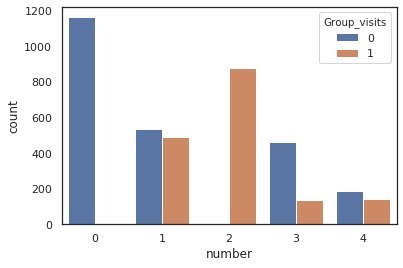

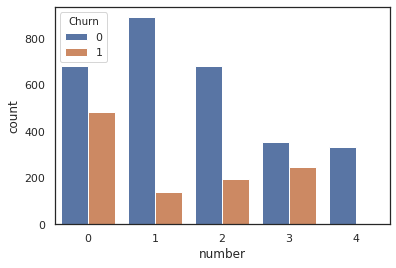

In [28]:
for i in ['Near_Location', 'Partner', 'Promo_friends', 'Contract_period',
       'Group_visits', 'Churn']:
    sns.countplot(x="number", hue=i, data=sport)
    plt.show() 

<div class="alert alert-info"> <b> </b> 
    
Кластеры явно распределены по 'Near_Location', 'Promo_friends', 'Contract_period',
'Group_visits', 'Churn'.  И только одна группа явно выделяется по 'Lifetime'.
    
</div>

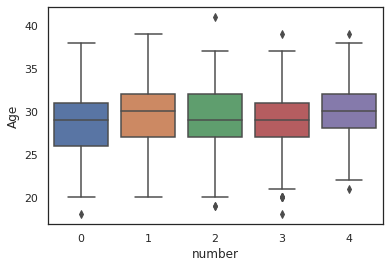

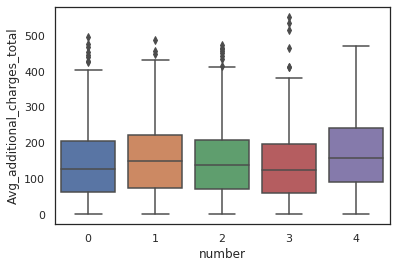

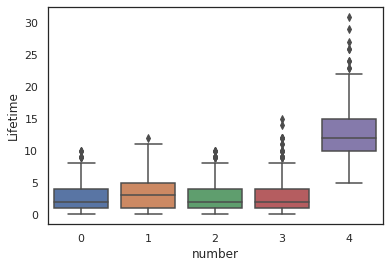

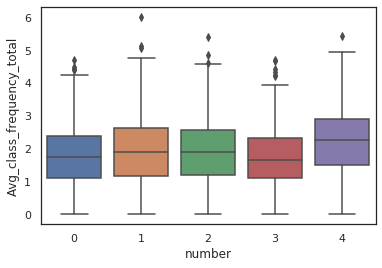

In [29]:
for i in ['Age', 'Avg_additional_charges_total', 'Lifetime',
       'Avg_class_frequency_total']:
    sns.boxplot(x='number',y=i, data=sport)
    plt.show() 

In [30]:
df = pd.DataFrame(
    {
        'cluster': [0,1,2,3,4],
        'Близость к клубу': ['-', '+', '+', '+', '+'],
        'Партнер клуба': ['50/50', '+', '-', '+', '-'],
        'По акции «приведи друга» ': ['-', '+', '-', '+', '-'],
        'Длительность абонемента': ['min', 7, 4, 8, 'min'],
        'Факт посещения груп.занятий': ['-', '+', '+', '+', '-'],
        'Lifetime': ['min', 'norm', 'norm', 'norm', 'min'],
        'Ср.частота посещений в неделю ALL, d': ['d<2','d<2','+d>2','+d>2','d<2'],
        'Ср.частота посещений за пред.мес,d': ['d<2','d<2','+d>2','+d>2','d<2'],
        'Факт оттока': ['max', 'norm', 'min', 'min', 'max'],
    }
)
df

,cluster,Близость к клубу,Партнер клуба,По акции «приведи друга»,Длительность абонемента,Факт посещения груп.занятий,Lifetime,"Ср.частота посещений в неделю ALL, d","Ср.частота посещений за пред.мес,d",Факт оттока
0,0,-,50/50,-,min,-,min,d<2,d<2,max
1,1,+,+,+,7,+,norm,d<2,d<2,norm
2,2,+,-,-,4,+,norm,+d>2,+d>2,min
3,3,+,+,+,8,+,norm,+d>2,+d>2,min
4,4,+,-,-,min,-,min,d<2,d<2,max


### Доля оттока для каждого кластера

In [31]:
sport.groupby('number')['Churn'].mean()

number
0    0.414445
1    0.133139
2    0.224629
3    0.408333
4    0.000000
Name: Churn, dtype: float64

<div class="alert alert-info"> <b> </b> 
    
**В кластерах  № 0, 1 отток клиентов минимальный. В кластере №2 немного выше. В кластерах № 3 и 4 отток значительно выше, чем в № 0 и 1.**
    
    
    
    
</div>

## Выводы и базовые рекомендации по работе с клиентами

<div class="alert alert-info"> <b> </b> 
    
Большая часть клиентов пользуется месячным абонементом, что не очень хорошо для клуба, возможно, стоит подумать над хорошим предложением по более длительным абонементам. Значительно увеличился поток клиентов, впервые обратившихся, 1-2 месяца назад (исходя из уникальных значений	'Lifetime' — Когорта 1 +2) 1450 человек, а это 36% от всех. Есть смысл обратить внимание на акции, предложения в это время и, возможно, повторить.


<b> Самым важными признаками, влияющими на отток являются: </b>     
   
Lifetime - время с момента первого обращения в фитнес-центр (влияет в бОльшей степени на отток),
    
средняя частота посещений в неделю за предыдущий месяц, 
    
средняя частота посещений в неделю за все время с начала действия абонемента.
<b>Чем больше вышеуказанные показатели, тем менее вероятен отток</b>     
   
Самым НЕ важными являются: Near_Location (проживание или работа в районе, где находится фитнес-центр),  использование промо-кода от знакомого при оплате первого абонемента, сотрудник компании-партнёра клуба,  факт посещения групповых занятий.
    
Есть смысл предложить дополнительные бонусы, наример, в качестве доп.занятий, кофе или предложений от партнеров, в случаях посещений в неделю не меньше 2-х. Новому клиенту к концу первого месяца предложить следующий месяц по спец.цене.
    
**Маркетинговые действия должны быть направлены на увеличение кол-ва посещений еженедельно, а также на переход клиента во второй месяц.**    
    


    
    
    
    
    
</div>